In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('out.csv')

In [ ]:
data.head()

,Unnamed: 0,Heading,Review,Read_more,Time
0,0,Amazing Nexon Ev,Amazing car for daily usage please plan the charging stations for a long trip more than 200km and I suggest to buy this car and it is also attractive and stylish for its own way ..,Read More,18 days ago | Rakshith B R
1,1,300 km range vs 400 km range.,"After driving Nexon EV for a few times, i feel there is much more factors that really makes Tata Succeed if they plan early. Tata should lower the Nexon price and increase market share Tata Punch ...",Read More,2 months ago | David
2,2,Great Car,Really very Amazing experience.Just loved that car.So beautiful car ever i had seen.More spacious car and every one will be comfortable.,Read More,4 months ago | Ruthik
3,3,Tata nexon EV review,Yes you can go for electric vehicle because it has good average. it is about to 130 km running backup. The electric vehicle is pollution free. we must switch on to electric vehicle. because we mus...,Read More,5 months ago | Pitho hansda
4,4,Good car,Good car with good safety and comfort with all options..... .. . ..... ....,Read More,6 months ago | Puni


In [ ]:
data=data.drop(['Read_more','Time'],axis=1)
data=data.reset_index(drop=True)
data.head()

,Unnamed: 0,Heading,Review
0,0,Amazing Nexon Ev,Amazing car for daily usage please plan the charging stations for a long trip more than 200km and I suggest to buy this car and it is also attractive and stylish for its own way ..
1,1,300 km range vs 400 km range.,"After driving Nexon EV for a few times, i feel there is much more factors that really makes Tata Succeed if they plan early. Tata should lower the Nexon price and increase market share Tata Punch ..."
2,2,Great Car,Really very Amazing experience.Just loved that car.So beautiful car ever i had seen.More spacious car and every one will be comfortable.
3,3,Tata nexon EV review,Yes you can go for electric vehicle because it has good average. it is about to 130 km running backup. The electric vehicle is pollution free. we must switch on to electric vehicle. because we mus...
4,4,Good car,Good car with good safety and comfort with all options..... .. . ..... ....


In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def clean_stopwords_shortwords(w):
    stopwords_list=stopwords.words('english')
    words = w.split() 
    clean_words = [word for word in words if (word not in stopwords_list) and len(word) > 2]
    return " ".join(clean_words) 

#Combined function that will be called to preprocess our text data
def preprocess_sentence(w):
    #lowercase all the text
    w = w.lower()
    #Remove puntuations
    w = re.sub(r"([?.!,¿])", r" ", w)
    w = re.sub(r'[" "]+', " ", w)
    w = re.sub(r"[^a-zA-Z?.!,¿]+", " ", w)
    #Calling stopword function
    w=clean_stopwords_shortwords(w)
    return w

In [ ]:
data['Preprocessed_Review']=data['Review'].map(preprocess_sentence)
data.head()

,Unnamed: 0,Heading,Review,Preprocessed_Review
0,0,Amazing Nexon Ev,Amazing car for daily usage please plan the charging stations for a long trip more than 200km and I suggest to buy this car and it is also attractive and stylish for its own way ..,amazing car daily usage please plan charging stations long trip suggest buy car also attractive stylish way
1,1,300 km range vs 400 km range.,"After driving Nexon EV for a few times, i feel there is much more factors that really makes Tata Succeed if they plan early. Tata should lower the Nexon price and increase market share Tata Punch ...",driving nexon times feel much factors really makes tata succeed plan early tata lower nexon price increase market share tata punch lakhs tata nexon range lakhs tata nexon range lakhs affordability...
2,2,Great Car,Really very Amazing experience.Just loved that car.So beautiful car ever i had seen.More spacious car and every one will be comfortable.,really amazing experience loved car beautiful car ever seen spacious car every one comfortable
3,3,Tata nexon EV review,Yes you can go for electric vehicle because it has good average. it is about to 130 km running backup. The electric vehicle is pollution free. we must switch on to electric vehicle. because we mus...,yes electric vehicle good average running backup electric vehicle pollution free must switch electric vehicle must save tree nature save money tata nexon looks nice tata group company trusted comp...
4,4,Good car,Good car with good safety and comfort with all options..... .. . ..... ....,good car good safety comfort options


In [ ]:
from nltk import FreqDist
pd.set_option("display.max_colwidth", 200)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

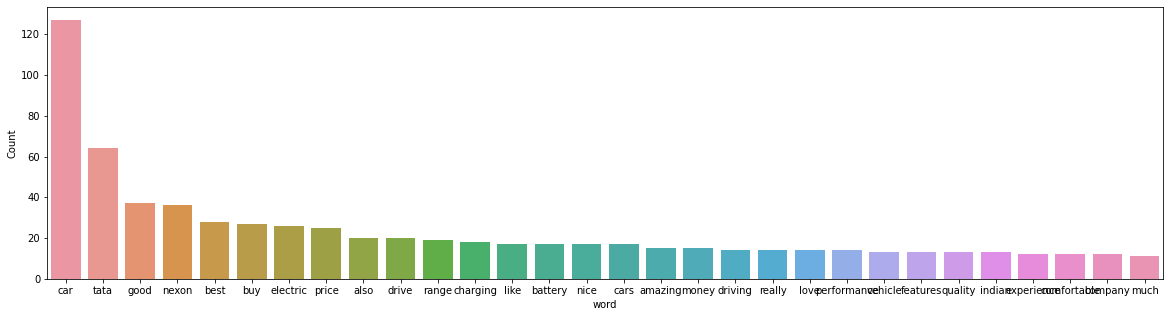

In [ ]:
freq_words(data['Preprocessed_Review'])


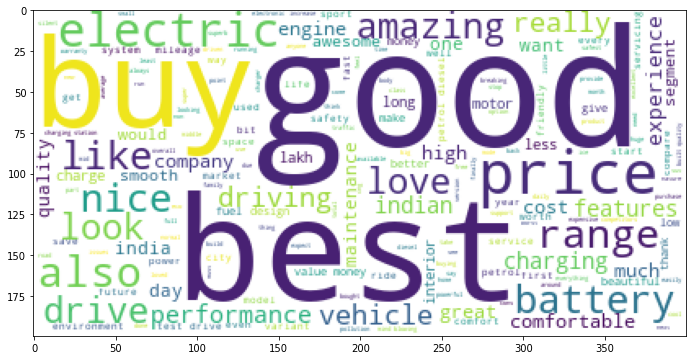

In [ ]:
from wordcloud import WordCloud
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['car', 'tata', 'nexon', 'cars'])
plt.figure(figsize=(12,6))
text = ' '.join([text for text in data['Preprocessed_Review'] if (text not in stopwords)])
wc = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(wc)


In [ ]:
Battery = data.Preprocessed_Review.str.split(expand=True).stack().value_counts().battery
Range = data.Preprocessed_Review.str.split(expand=True).stack().value_counts().range
Power = data.Preprocessed_Review.str.split(expand=True).stack().value_counts().power
Performance = data.Preprocessed_Review.str.split(expand=True).stack().value_counts().performance
comfort = data.Preprocessed_Review.str.split(expand=True).stack().value_counts().comfort
space = data.Preprocessed_Review.str.split(expand=True).stack().value_counts().space
Mileage = data.Preprocessed_Review.str.split(expand=True).stack().value_counts().mileage 
design = data.Preprocessed_Review.str.split(expand=True).stack().value_counts().design  

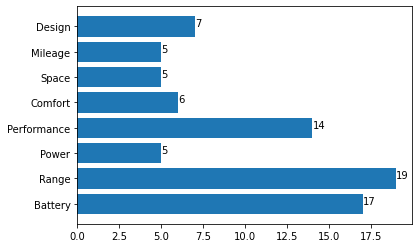

In [ ]:
x = ['Battery', 'Range', 'Power', 'Performance', 'Comfort', 'Space', 'Mileage', 'Design']
y = [Battery, Range, Power, Performance, comfort, space, Mileage, design]
plt.barh(x, y)
 
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
 
plt.show()

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
def calculate_sentiment(review):
  text = TextBlob(review)
  return text.sentiment.polarity

In [ ]:
data['Sentiment_Score']=data['Review'].map(calculate_sentiment)
data.head()

,Unnamed: 0,Heading,Review,Preprocessed_Review,Sentiment_Score
0,0,Amazing Nexon Ev,Amazing car for daily usage please plan the charging stations for a long trip more than 200km and I suggest to buy this car and it is also attractive and stylish for its own way ..,amazing car daily usage please plan charging stations long trip suggest buy car also attractive stylish way,0.421429
1,1,300 km range vs 400 km range.,"After driving Nexon EV for a few times, i feel there is much more factors that really makes Tata Succeed if they plan early. Tata should lower the Nexon price and increase market share Tata Punch ...",driving nexon times feel much factors really makes tata succeed plan early tata lower nexon price increase market share tata punch lakhs tata nexon range lakhs tata nexon range lakhs affordability...,0.222222
2,2,Great Car,Really very Amazing experience.Just loved that car.So beautiful car ever i had seen.More spacious car and every one will be comfortable.,really amazing experience loved car beautiful car ever seen spacious car every one comfortable,0.682500
3,3,Tata nexon EV review,Yes you can go for electric vehicle because it has good average. it is about to 130 km running backup. The electric vehicle is pollution free. we must switch on to electric vehicle. because we mus...,yes electric vehicle good average running backup electric vehicle pollution free must switch electric vehicle must save tree nature save money tata nexon looks nice tata group company trusted comp...,0.409048
4,4,Good car,Good car with good safety and comfort with all options..... .. . ..... ....,good car good safety comfort options,0.700000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


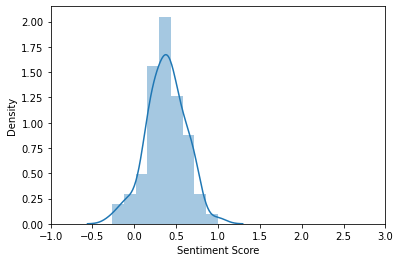

In [ ]:
sns.distplot(data['Sentiment_Score'])
plt.xlim([-1, 3]);
plt.xlabel('Sentiment Score');